In [1]:
# Handling Data
import pandas as pd
import numpy as np

# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For Text processing
import nltk
import string
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
#nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter

#ML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Accuracy Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# I have a dataset spam_ham_dataset,Using that dataset I'm going to train my model
##  Data Perprocessing/Cleaning

In [2]:
df = pd.read_csv('spam_ham_dataset.csv') # load the dataset to pandas data frame
print(df.info())
print("-"*100)
print("Number of rows and columns:-",df.shape) # displays number of rows and columns
print("Names of columns:- ",df.columns) #displays names of columns
print("-"*100)
df.sample(5) # to check the contents in the data set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None
----------------------------------------------------------------------------------------------------
Number of rows and columns:- (5171, 4)
Names of columns:-  Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')
----------------------------------------------------------------------------------------------------


,Unnamed: 0,label,text,label_num
86,358,ham,"Subject: income tax\r\ndaren , tell tonya i ca...",0
4757,416,ham,Subject: would you have an objection to mappin...,0
217,1243,ham,"Subject: july 25 , 2000\r\n- - - - - forwarded...",0
126,4635,spam,Subject: notebookplus batteries\r\nvisit : htt...,1
5124,4750,spam,"Subject: feel too old\r\ngo on , click and hel...",1


## 'spam'-'label'= 1
## 'ham' -'label'= 0
## Here we only require 'text' and 'label_num' ,so we remove 'Unnamed: 0' and 'label'

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True) #removing unnamed:0  column from dataset
df.drop('label',axis=1,inplace=True)
print("Number of rows and columns:-",df.shape) # displays number of rows and columns
print("Names of columns:- ",df.columns)  # displays names of columns

Number of rows and columns:- (5171, 2)
Names of columns:-  Index(['text', 'label_num'], dtype='object')


In [4]:
print("Count duplicate value:-",df.duplicated().sum()) # count for duplicate values
df = df.drop_duplicates(keep='first') # remove duplicates
print("-"*100)
print("Count duplicate value(Again):-",df.duplicated().sum()) # count for duplicate values
print("-"*100)
print("Number of rows and columns:-",df.shape) # displays number of rows and columns


Count duplicate value:- 178
----------------------------------------------------------------------------------------------------
Count duplicate value(Again):- 0
----------------------------------------------------------------------------------------------------
Number of rows and columns:- (4993, 2)


In [5]:
df.rename(columns={'text':'Text','label_num':'Target'},inplace=True) # renaming the cols
df.sample(5)

,Text,Target
2767,"Subject: 987012\r\ndaren , i just talked to ma...",0
3989,Subject: potential well head - january 2000\r\...,0
2023,"Subject: lng - europe\r\ndarren ,\r\nthanks fo...",0
104,Subject: \r\n80 %\r\n?????????\r\n???\r\n?????...,1
2340,Subject: nesa / hea ' s 9 th annual crawfish b...,0


# Data analysis / Reading Data

Text(0.5, 0, 'Target [0=ham, 1=spam]')

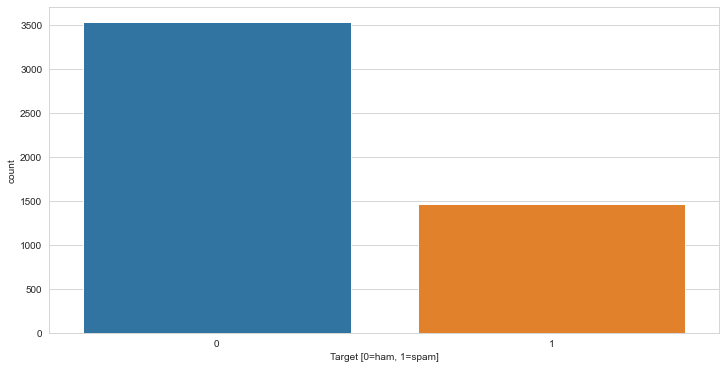

In [6]:
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'Target')
plt.xlabel('Target [0=ham, 1=spam]')

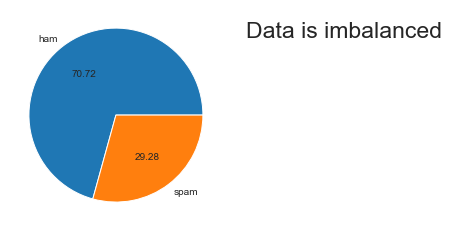

In [7]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.text(1.5, 0.9, 'Data is imbalanced', fontsize = 23)
plt.show()

In [8]:
df['num_Characters'] = df['Text'].apply(len) # number of Characters
df['num_Words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) # number of Words
df['num_Sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x))) # number of Sentenses
df

,Text,Target,num_Characters,num_Words,num_Sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3
...,...,...,...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0,869,197,9
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13
5169,Subject: industrial worksheets for august 2000...,0,573,112,20


In [9]:
df[['num_Characters','num_Words','num_Sentences']].describe()


,num_Characters,num_Words,num_Sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.305628
std,1547.863387,340.702932,26.887339
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [39]:
# ham
df[df['Target'] == 0][['num_Characters','num_Words','num_Sentences']].describe()#.to_excel("output_ham.xlsx")

,num_Characters,num_Words,num_Sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [40]:
# spam
df[df['Target'] == 1][['num_Characters','num_Words','num_Sentences']].describe()#.to_excel("outpu_spam.xlsx")

,num_Characters,num_Words,num_Sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.274282
std,1840.112883,349.439381,29.960218
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,577.000000


<AxesSubplot:xlabel='num_Characters', ylabel='Count'>

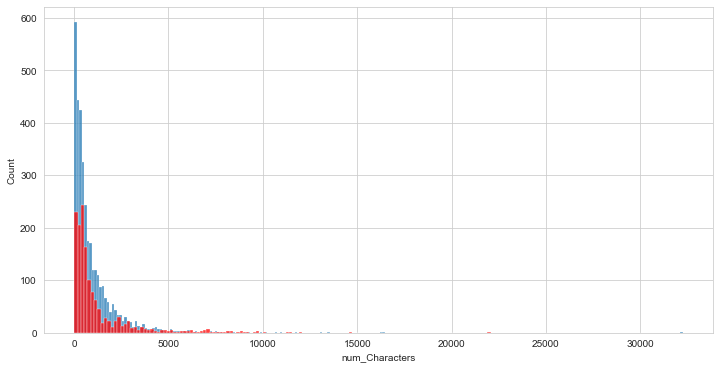

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_Characters'])
sns.histplot(df[df['Target'] == 1]['num_Characters'],color='red')

<AxesSubplot:xlabel='num_Words', ylabel='Count'>

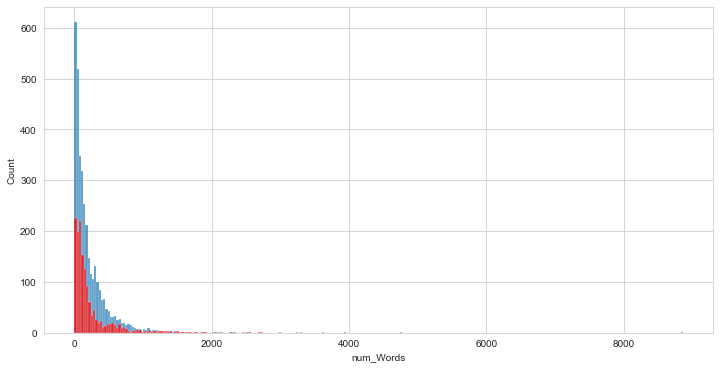

In [13]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_Words'])
sns.histplot(df[df['Target'] == 1]['num_Words'],color='red')

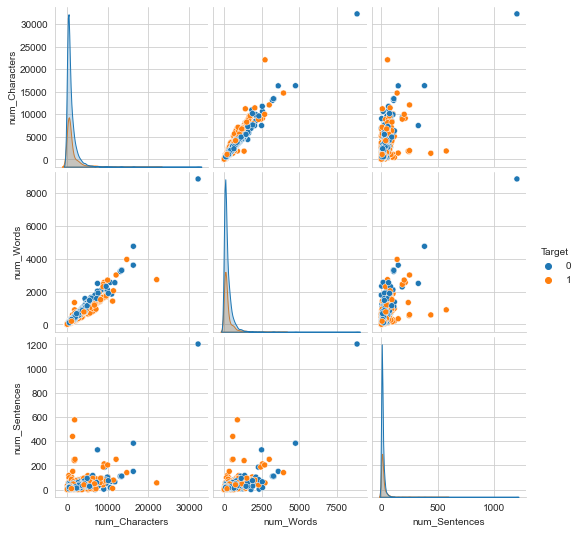

In [14]:
sns.pairplot(df,hue='Target')

# Data/Text Preprocessing(removing punctuation,stopwords from the text)
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [15]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [16]:

df['transformed_Text'] = df['Text'].apply(transform_text)
df

,Text,Target,num_Characters,num_Words,num_Sentences,transformed_Text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0,869,197,9,subject fw crosstex energi driscol ranch 1 3 m...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7,subject put 10 ft transport volum decreas 2500...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13,subject 3 4 2000 follow nom hpl take extra 15 ...
5169,Subject: industrial worksheets for august 2000...,0,573,112,20,subject industri worksheet august 2000 activ a...


In [17]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_Text'].str.cat(sep=" "))

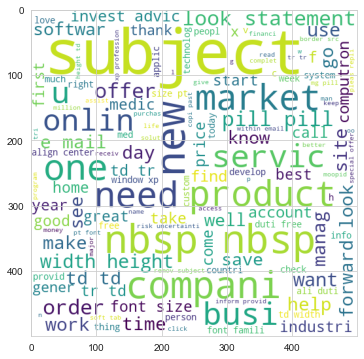

In [18]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

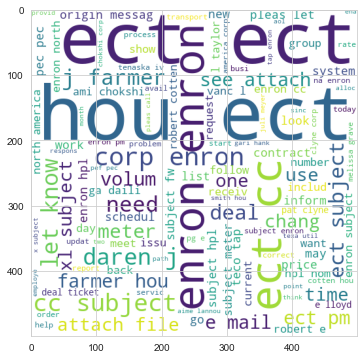

In [19]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [20]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

196592

C:\Users\Ayushman singh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


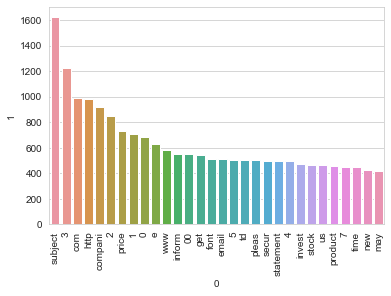

In [21]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [22]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

380475

C:\Users\Ayushman singh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


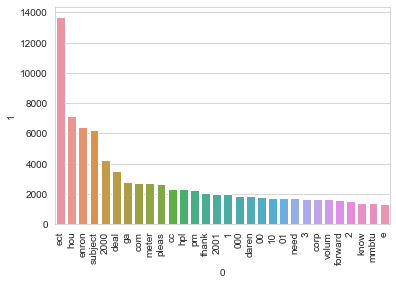

In [23]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [24]:

cv=CountVectorizer(max_features=5600)
X= cv.fit_transform(df['transformed_Text']).toarray()# sparse array to dense array
print(X.shape)
X

(4993, 5600)


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [26]:
y=df['Target'].values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [28]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [29]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'LR': lrc, 
}

In [30]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confusion =confusion_matrix(y_test,y_pred)
    
    return accuracy,precision,confusion

In [31]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_confusion = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion Matrix - \n",current_confusion)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.7497497497497497
Precision -  0.5177453027139874
Confusion Matrix - 
 [[501 231]
 [ 19 248]]
For  NB
Accuracy -  0.943943943943944
Precision -  0.9011406844106464
Confusion Matrix - 
 [[706  26]
 [ 30 237]]
For  LR
Accuracy -  0.950950950950951
Precision -  0.8920863309352518
Confusion Matrix - 
 [[702  30]
 [ 19 248]]


In [32]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.943944,0.901141
2,LR,0.950951,0.892086
0,KN,0.749750,0.517745


In [33]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.943944
1,LR,Accuracy,0.950951
2,KN,Accuracy,0.749750
3,NB,Precision,0.901141
4,LR,Precision,0.892086
5,KN,Precision,0.517745


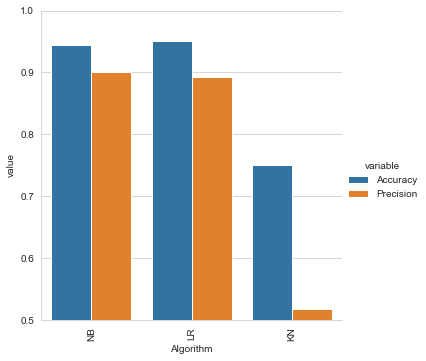

In [34]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model improvement
## Scaling

In [34]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [53]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [54]:
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,NB,0.943944,0.901141
2,LR,0.950951,0.892086
0,KN,0.749750,0.517745


In [40]:

new_df = temp_df

In [41]:
new_df

,Algorithm,Accuracy,Precision
1,NB,0.960961,0.893103
2,LR,0.958959,0.892361
0,KN,0.839840,0.632754


In [57]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled.to_excel("output.xlsx",index = False)

In [35]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# Testing a random data

In [40]:
msg="my name is aman" #"You Win 10 Dollars"
data = [msg]
vect = cv.transform(data).toarray()
result = mnb.predict(vect)
print(result)

[0]
